# **Librería de visualización de *Python*: *Matplotlib* (parte 1)** 
---

***Matplotlib*** es la librería de gráficos 2D y 3D por excelencia del ecosistema de computación científica de *Python*. Fue creada por *John Hunter* asemejando las funcionalidades de visualización de MatLab en *Python*. 

Algunas de las principales ventajas de *Matplotlib* son:

* Salida de alta calidad en muchos formatos.
* Muy personalizable.
* Todos los aspectos de las gráficas se controlan mediante código, por lo cual es reproducible.

Para mayor información acerca del proyecto ingrese a la página web oficial de [*Matplotlib*](http://matplotlib.org/).

## **0. Importar *Matplotlib***
---

En caso de ser necesario se puede instalar el módulo *Matplotlib* con el siguiente comando de consola:

```
 pip install matplotlib
 ```

En la mayoría de casos, al trabajar con visualizaciones en *Matplotlib* se utiliza el submódulo **`matplotlib.pyplot`**, que es usualmente importado con el alias **`plt`**. Esta convención es ampliamente aceptada y recomendada, por lo que es común encontrarla en muchos ejemplos o recursos en línea.

In [1]:
import matplotlib.pyplot as plt

En ocasiones es necesario importar el módulo completo, que se realiza con el alias **`mpl`**. Es menos común, pero necesario en ocasiones cuando se trata con configuraciones más específicas.

In [28]:
import matplotlib as mpl

## Librerias esenciales
import pandas as pd
import numpy as np

*Matplotlib* implementa interacciones con objetos de *NumPy* y *Pandas*. De hecho, las visualizaciones de objetos *Series* y *DataFrame* de *Pandas* descritas en la Unidad 2 están construidas usando *Matplotlib* por defecto. Veamos un ejemplo, graficando un *DataFrame* de *Pandas* mediante el método **`plot`**:

<AxesSubplot:>

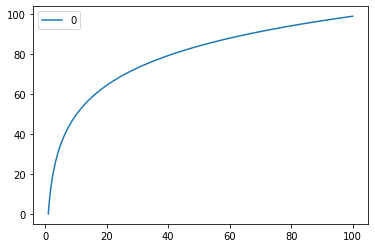

In [4]:
s = pd.DataFrame(np.arange(100), np.logspace(0,2, 100))

s.plot.line() # El objeto generado es un objeto de Matplotlib: e.g. <matplotlib.axes._subplots.AxesSubplot at 0x...>

En los primeros ejemplos de esta guía usaremos dos arreglos de *NumPy* para representar la visualización de funciones matemáticas. Se pueden usar también listas de *Python*, pero es probable que en la práctica la mayoría de las veces se construyan visualizaciones a partir de arreglos de *NumPy* o de columnas de *DataFrames* de *Pandas*. Es de esta forma en que se realizará en el transcurso de la guía.

Generaremos el arreglo **`x`**  que contendrá $10$ números entre $0$ y $5$, separados de forma uniforme (función **`np.linspace`**) y un segundo arreglo **`y`** en el cual sus elementos son los mismos del arreglo **x** tras aplicar una función matemática ($y = x^2$):

In [5]:
x = np.linspace(0, 5, 10) 
y = x**2   

In [6]:
x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [7]:
y

array([ 0.        ,  0.30864198,  1.2345679 ,  2.77777778,  4.9382716 ,
        7.71604938, 11.11111111, 15.12345679, 19.75308642, 25.        ])

Además, se construirá un *DataFrame* de *pandas* con los mismos datos para ilustrar algunos ejemplos:

In [8]:
df = pd.DataFrame({'y': y}, index  = x)

En *Matplotlib* existen 2 formas de trabajar. Un método funcional inspirado en las funcionalidades de visualización de la herramienta [*Matlab*](https://www.mathworks.com/products/matlab.html), y un método orientado a objetos que permite una mayor personalización y flexibilidad. Aunque el segundo método es el más recomendado por su modularidad, se presentarán ambos métodos por completitud.

## **1. Método funcional (`plt.plot`)**
___
En el modo funcional se usa el método **`plot`**, al cual le son pasados los datos a diagramar. Este identifica e interpreta dinámicamente cómo debe construir la visualización. Para el caso del ejemplo, se pasan como argumentos los arreglos **`x`** y **`y`**.

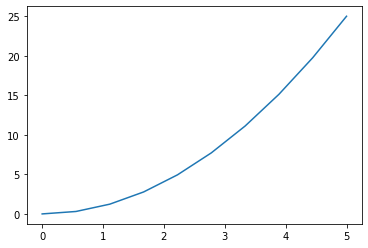

In [9]:
plt.plot(x, y);

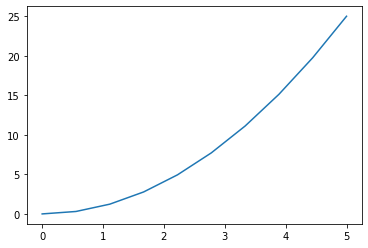

In [10]:
plt.plot(df) # Equivalente a llamar la función df.plot()

El resultado es la visualización en un plano cartesiano de los valores contenidos en los dos arreglos **`x`** y **`y`**.

*Matplotlib* debe su popularidad en parte a su flexibilidad al permitir la personalización en detalle de las gráficas generadas. Dentro de las opciones  para personalizar las visualizaciones está la definición de los títulos de los ejes **`x`** y **`y`**, el título del diagrama, el color de la gráfica, el tamaño y forma de cada par de datos en el diagrama, entre otros.

Cada uno de estos métodos se verán más adelante. En este momento se utilizarán para ilustrar su uso y las diferencias entre los dos enfoques de *Matplotlib*.

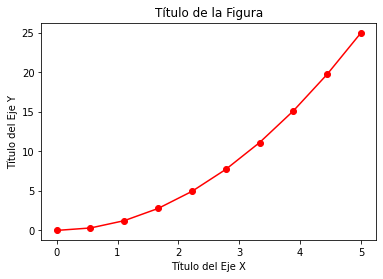

In [11]:
plt.plot(x, y, 'r', marker='o') #Los argumentos 'r' y marker = 'o' se discutirán más adelante.
plt.xlabel('Título del Eje X')
plt.ylabel('Título del Eje Y')
plt.title('Título de la Figura')
plt.show()

Con *Matplotlib* es posible hacer modificaciones al estilo de *MatLab* para controlar el aspecto de las gráficas. Si ha utilizado dicha herramienta con anterioridad, gran parte de la sintaxis de *Matplotlib* le parecerá familiar. Por ejemplo se puede definir el color y el estilo de línea como se ilustra en el siguiente ejemplo:

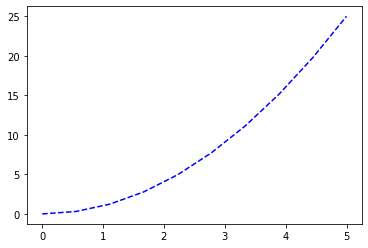

In [12]:
plt.plot(x, y, 'b--') #El argumento b-- le indica a matplotlib
                      #que genere una gráfica azul (blue) y de líneas intermitentes (--)

### **1.1. Creación de múltiples visualizaciones - `plt.subplot`**
---
*Matplotlib* permite dibujar más de una gráfica sobre el mismo espacio de trabajo o *canvas*. Esto se realiza mediante la función **`subplot`**, la cual recibe tres parámetros: el número de filas, el número de columnas y el número o índice del **`plot`** a seleccionar. Cuando se decida cambiar la referencia a otra gráfica se tiene que realizar un llamado nuevo al método **`subplot`**.

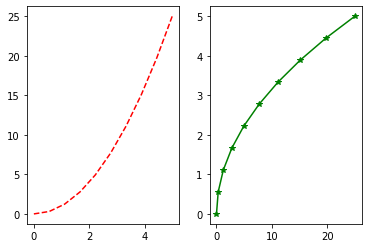

In [13]:
### plt.subplot(nrows, ncols, plot_number) ###

plt.subplot(1,2,1)    # 1 fila, 2 columnas, referenciando el plot número 1
plt.plot(x, y, 'r--') # Figura roja

plt.subplot(1,2,2)    # ahora se referencia el plot número 2
plt.plot(y, x, 'g*-') # Figura verde

plt.show()

Con el tercer parámetro se referencia el *plot* (componente del *canvas*) sobre el que se dibujará. Como ejemplo vemos en el siguiente código que al mantener referenciado el mismo *plot*, logramos que las gráficas se dibujen en la misma gráfica.

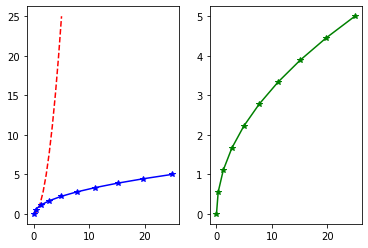

In [14]:
plt.subplot(1,2,1)      # 1 fila, dos columnas y se está referenciando el número 1
plt.plot(x, y, 'r--')   # Figura roja en el plot 1
plt.plot(y, x, 'b*-')   # Con la referencia aún al plot 1, se dibuja otra gráfica (azul)

plt.subplot(1,2,2)      # ahora se referencia el plot número 2
plt.plot(y, x, 'g*-')

## **2. Método orientado a objetos**
---

A continuación realizaremos una introducción al método orientado a objetos de *Matplotlib*. La lógica detrás de este enfoque consiste en crear objetos de la clase **`Figure`** y luego emplear métodos o atributos de ese objeto. Este enfoque es más práctico cuando se trata de un canvas que tiene múltiples gráficos en él.

Para comenzar, creamos una instancia (objeto) de figura, esto es, un canvas o área de trabajo en limpio. Posteriormente, se agregan los gráficos internos o "ejes" (objeto **`Axes`**) a esa figura. Los *axes* son componentes independientes dentro de una figura que pueden ser considerados subfiguras. No se deben confundir con los ejes del plano cartesiano.


Los *axes* se adicionan con la función **`add_axes()`**, la cual recibe como parámetro una lista con cuatro valores entre $0$ y $1$ en notación decimal que representan en forma porcentual la posición de los ejes (izquierda, abajo), y las dimensiones de estos (ancho, alto):

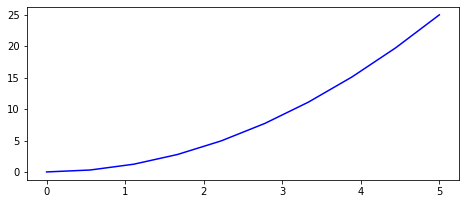

In [15]:
fig = plt.figure()    # Creamos una Figura (canvas vacío) 
axes = fig.add_axes([0, 0, 1, 0.6])   #Añadimos los ejes en las proporciones indicadas.
                      # Los primeros dos números se refieren a la esquina inferior izquierda de la gráfica (0, 0)
                      # Los últimos dos números se refieren a las proporciones de ancho y alto (1, 0.6)                      
axes.plot(x, y, 'b') 

A primera vista el método orientado a objetos podría parecer más complicado. Sin embargo, es mucho más flexible y modular, por lo que se recomienda su uso cuando la visualización es más compleja.

Ahora, los métodos de personalización se ejecutan directamente en objetos **`Figure`** y sus componentes básicos **`Axes`**.  En este caso, se agrega el prefijo **`set_*`**, para alterar el valor específico e independiente de cada figura, a diferencia de los métodos del método funcional.

Text(0.5, 1.0, 'Título de la Figura')

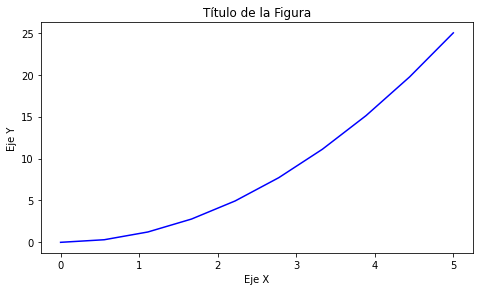

In [16]:
fig = plt.figure()  
axes = fig.add_axes([0, 0, 1, 0.8]) 
axes.plot(x, y, 'b')   

# Nótese el uso de "set_" al principio del nombre de los métodos (diferente del método funcional).
axes.set_xlabel('Eje X')              # Equivalente a plt.xlabel.
axes.set_ylabel('Eje Y')              # Equivalente a plt.ylabel.
axes.set_title('Título de la Figura') # Equivalente a plt.title.

Como se indicó anteriormente, el método orientado a objetos tiene ciertas ventajas sobre el método funcional convencional porque permite tener un mayor control sobre la diagramación. Por ejemplo, se tiene más control sobre el manejo y ubicación de los *axes*, permitiendo, entre otras cosas, trabajar con más de un par de objetos **`Axes`**, que representan una subgráfica rodeada de ejes del plano cartesiano, sobre una misma figura como se muestra en el siguiente ejemplo:


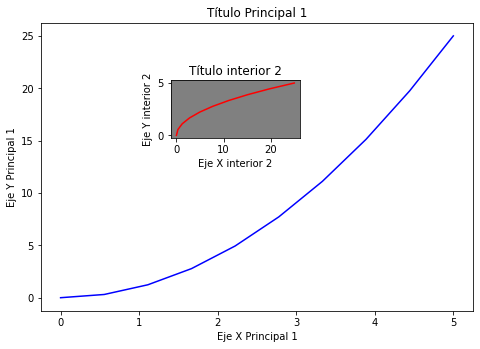

In [21]:
# Crea un canvas vacío
fig = plt.figure()

ax1 = fig.add_axes([0.0, 0.0, 1.0, 1.0]) # Subgráfica principal
ax2 = fig.add_axes([0.3, 0.6, 0.3, 0.2]) # Subgráfica interior

# Figura principal Axes 1
ax1.plot(x, y, 'b')
ax1.set_xlabel('Eje X Principal 1')
ax1.set_ylabel('Eje Y Principal 1')
ax1.set_title('Título Principal 1')

# Inserta Figura Axes 2
ax2.plot(y, x, 'r')
ax2.set_xlabel('Eje X interior 2')
ax2.set_ylabel('Eje Y interior 2')
ax2.set_title('Título interior 2')
ax2.set_facecolor('gray') #Método para cambiar el color del fondo.
#Ambos Axes están asociados al objeto fig original.

### **2.1. Creación de múltiples visualizaciones - `plt.subplots`**
---
El método **`plt.subplots()`** sirve como gestor automático de gráficos. De esta manera se puede crear más de una gráfica sobre una misma figura. El método retorna una instancia de tipo **`Figure`** y un arreglo de ejes que referencia a cada una de las gráficas.

Algunos casos de uso comunes:

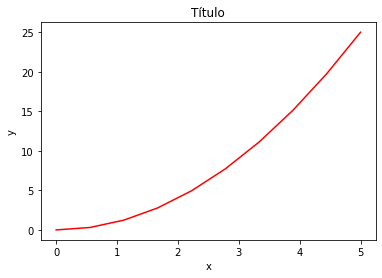

In [22]:
# Se usa de forma similar a plt.figure() excepto que devuelve
# al mismo tiempo un objeto Figure y un objeto/arreglo de ejes Axes.

fig, axes = plt.subplots()

# Ahora se usa el eje, como antes, para graficar en él
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Título'); # El ";" final no es obligatorio, sólo evita que se muestre la info del objeto en el notebook

En el llamado al método **`subplots`**, se puede especificar el número de filas y columnas en que se dividirá el canvas para mostrar el arreglo de figuras que se desee. Cada eje retornado en el arreglo puede ser referenciado mediante el uso de índices, para controlar de manera independiente las propiedades y el aspecto de cada gráfico. El número de filas se define mediante el parámetro **`nrows`** y el de columnas mediante el parámetro **`ncols`**. En el siguiente ejemplo se ilustra su uso mediante la creación de un canvas con 1 fila y 2 columnas (2 gráficos).

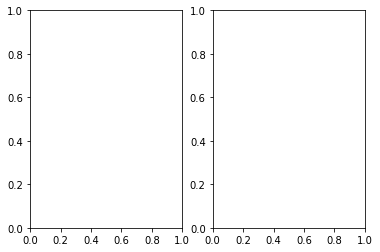

In [23]:
# Canvas vacío de 1x2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [24]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

El objeto retornado es un arreglo de ejes **`Axes`** sobre los cuales se puede graficar. Por lo tanto, es posible referenciar cada gráfico mediante su índice, y de esta manera, graficar sobre cada uno de ellos y definir su aspecto de manera independiente:



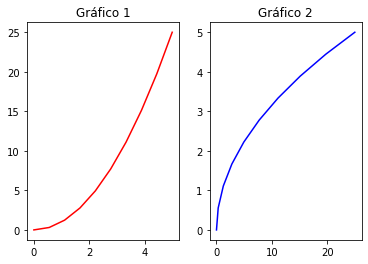

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x,y,'r')  # Seleccionamos el eje (axes) con el índice 0 (axes[0])
axes[1].plot(y,x,'b')  # Seleccionamos el eje (axes) con el índice 1 (axes[1])
axes[0].set_title('Gráfico 1')
axes[1].set_title('Gráfico 2');

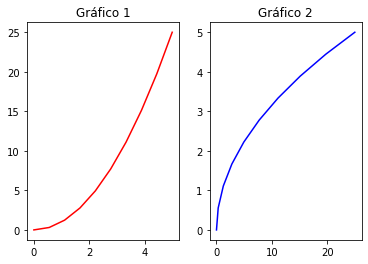

In [26]:
#También se pueden desempaquetar como si se tratase de tuplas
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

ax0.plot(x,y,'r')
ax1.plot(y,x,'b')
ax0.set_title('Gráfico 1')
ax1.set_title('Gráfico 2');

Un problema común en *Matplolib* es la superposición de gráficos. Podemos utilizar el método **`fig.tight_layout()`** o **`plt.tight_layout`** para ajustar automáticamente las posiciones de los ejes en el canvas de la figura para que no haya contenido superpuesto. A continuación se presenta un ejemplo donde hay superposición de elementos, y después, se muestra cómo solucionarlo.

> **Nota:** El método **`subplots`** también puede ser definido con más de una fila y más de una columna.

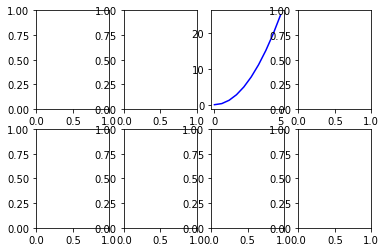

In [27]:
# Canvas vacío de 2x4 subplots

fig, axes = plt.subplots(nrows=2, ncols=4)
axes[0,2].plot(x, y, 'b') # Seleccionamos la fila 0, columna 2 (axes[0,2])

# Debido a la gran cantidad de sub-figuras, el resultado presenta problemas de superposición de elementos

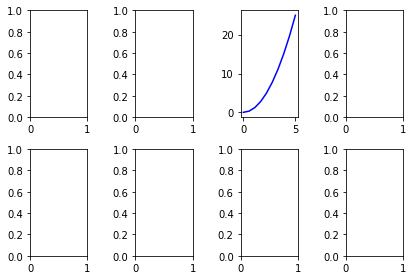

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4)
axes[0,2].plot(x, y, 'b')

fig.tight_layout()   #Para prevenir la superposición de elementos.

Para este caso, en el que se definen $n$ filas y $m$ columnas, el arreglo de ejes retornados será una matriz de $n \times m$ y se puede acceder a cada gráfico ya sea iterando sobre este arreglo, o mediante el uso de índices para referenciar cada elemento de una matriz bidimensional: 

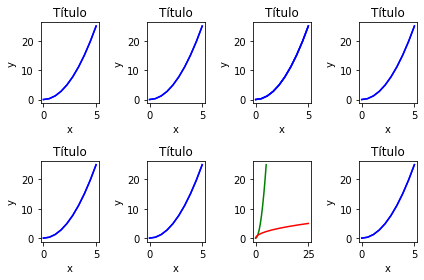

In [30]:
for row in axes:       #Acceso mediante la iteración de sus elementos
    for ax in row:
        ax.plot(x, y, 'b')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Título')

axes[1,2].clear()
axes[1,2].plot(x, y, 'g')          #Acceso mediante sus índices
axes[1][2].plot(y, x, 'r')         #Otra manera (No recomendada)


fig.tight_layout()

# Para mostrar la figura    
fig # Es necesario porque había sido creada en una celda anterior

## **3. Personalización de visualizaciones**
---
 
Una vez definidos los dos estilos principales para realizar visualizaciones con *Matplotlib*, vamos a discutir las opciones de personalización de las visualizaciones construidas en ambos métodos.

### **3.1. Tamaño de figuras y DPI (Dots per Inch)**
---
*Matplotlib* permite especificar el *DPI* y el tamaño de la figura cuando se crea un objeto **`Figure`**. Para esto, se usan los argumentos de las palabras clave **`figsize`** y **`dpi`**.
* **`figsize`** es una tupla del ancho y alto de la figura en pulgadas.
* **`dpi`** es el punto por pulgada (pixel por pulgada).

Por ejemplo:

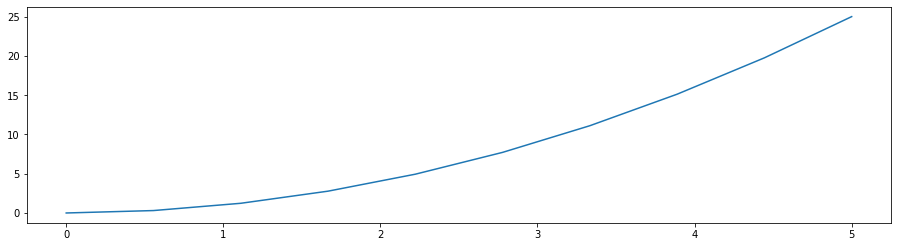

In [31]:
fig = plt.figure(figsize=(12,3))  # 12 x 3 pulgadas.

ax = fig.add_axes([0,0,1,1])
ax.plot(x,y);

Estos mismos argumentos también se pueden pasar a los manejadores de layout, como el método **`subplots`**:

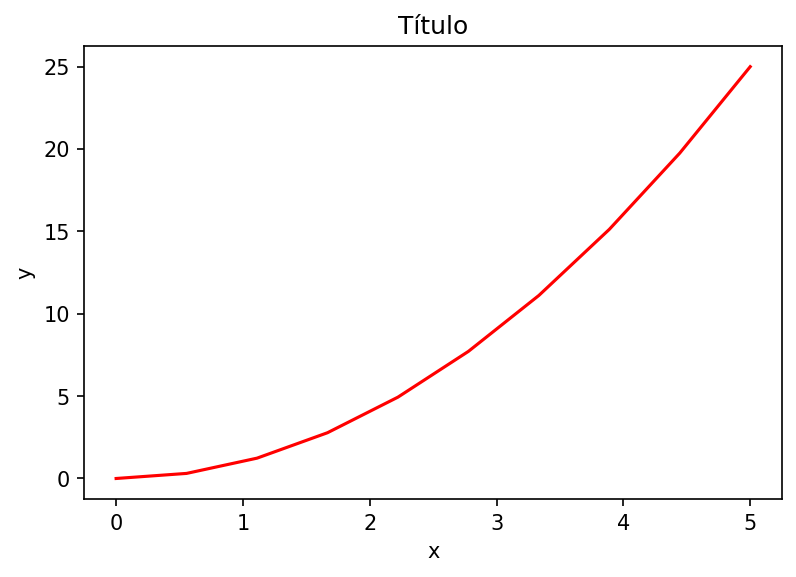

In [32]:
fig, axes = plt.subplots(dpi=150)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Título');

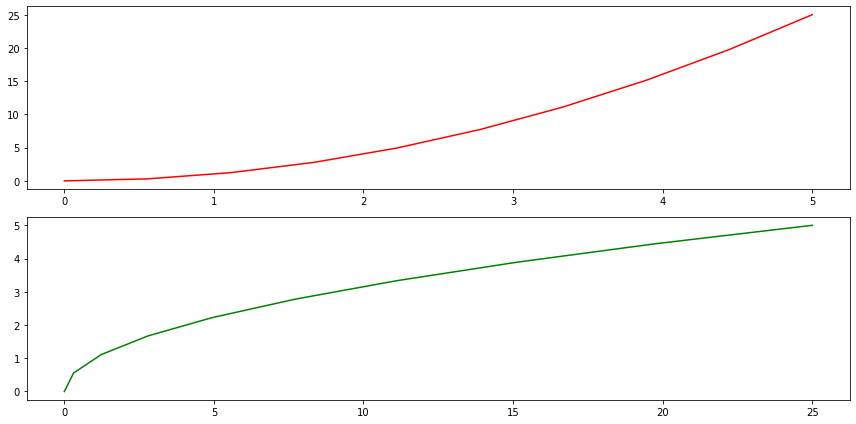

In [33]:
#Estos argumentos afectan a la figura, y por tanto
#al espacio disponible para cada Axes.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

axes[0].plot(x, y, 'r') #Subfigura de 12 x 3 pulgadas
axes[1].plot(y, x, 'g') #Subfigura de 12 x 3 pulgadas

plt.tight_layout()

### **3.2. Leyendas, etiquetas, títulos**
---
Veamos cómo agregar títulos, etiquetas de ejes y leyendas a la figura. El texto en *Matplotlib* tiene varias propiedades interesantes. Una de ellas es su interacción con el lenguaje de marcado *LaTeX*, usado para renderizar ecuaciones, de manera similar al lenguaje *Markdown*, usado en las celdas de texto de los *Jupyter Notebook*.

#### **3.2.1. Títulos de Figuras**
---

Use el método **`set_title`** en el objeto **`Axes`**:

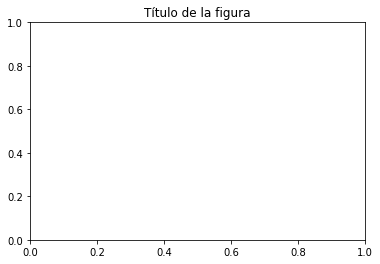

In [34]:
fig, ax = plt.subplots()
ax.set_title("Título de la figura");

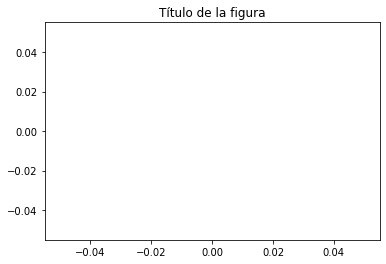

In [35]:
#Equivalente en el método funcional.

plt.plot()
plt.title("Título de la figura");

#### **3.2.2. Etiquetas de ejes**
---

Los métodos **`set_xlabel`** y **`set_ylabel`** permiten asignar nombres a los ejes $x$ y $y$ de los objetos **`Axes`**:

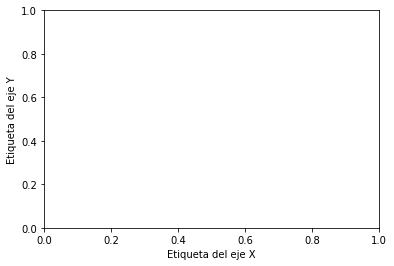

In [36]:
fig, ax = plt.subplots()

ax.set_xlabel("Etiqueta del eje X")
ax.set_ylabel("Etiqueta del eje Y");

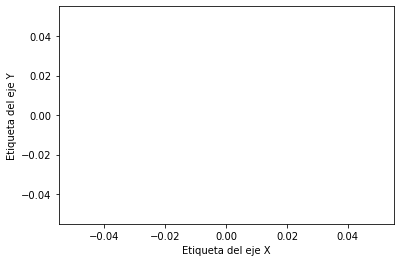

In [37]:
#Equivalente en el método funcional.
plt.plot()

plt.xlabel("Etiqueta del eje X")
plt.ylabel("Etiqueta del eje Y");

#### **3.2.3. Leyenda**
---
Se puede usar el parámetro **`label= "texto leyenda"`** cuando se añaden plots u otros objetos a la figura. Después, se llama al método **legend** para incluir la leyenda en el gráfico: 

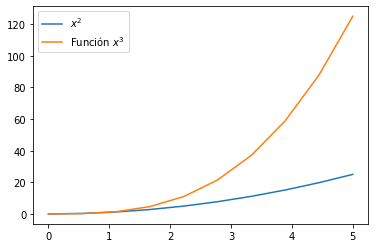

In [38]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="$x^2$") # Texto en formato LaTeX entre símbolos "$"
ax.plot(x, x**3, label="Función $x^3$")
ax.legend();

El método **`legend`** tiene un parámetro opcional **`loc`** que se usa para especificar la posición de la leyenda en la figura. Soporta códigos numéricos o la cadena directamente. Le invitamos a consultar la [documentación](https://matplotlib.org/tutorials/intermediate/legend_guide.html#legend-location) para conocer muchas más opciones.

Para conocer varias opciones, ejecute varias veces la siguiente celda, comentando/descomentando las diferentes líneas de código para ver el resultado:

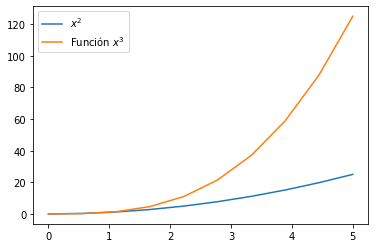

In [39]:
# Descomente las líneas (una a una) para ver la diferencia.

ax.legend(loc=0) # Matplotlib decide la mejor posición

# Predeterminados
#ax.legend(loc=1) # arriba a la derecha
#ax.legend(loc=2) # arriba a la izquierda
#ax.legend(loc=3) # abajo a la izquierda
#ax.legend(loc=4) # abajo a la derecha

# Personalizado
#ax.legend(loc=(0.5,0.1),frameon=False)
#ax.legend(loc=(1.02,0.1),fancybox=True)

fig

### **3.3. Colores, ancho de líneas y tipo de líneas**
---
*Matplotlib* ofrece muchas opciones para personalizar el estilo de los marcadores como líneas o puntos, permitiendo modificar cosas como su color, ancho y tipo. 

*Matplotlib* soporta una sintaxis básica similar a *MatLab* que sugerimos evitar en aras de la claridad, a menos de que esté familiarizado con la herramienta:

#### **3.3.1. Sintaxis similar a MatLab**
---
Con *Matplotlib* podemos definir los colores de las líneas y otros elementos gráficos de varias maneras. En primer lugar, podemos usar la sintaxis similar a *MatLab* donde **`'b'`** significa azul, **`'g'`** significa verde, etc. También se pueden seleccionar estilos de línea donde, por ejemplo, **`'b.-'`** significa una línea azul con puntos:


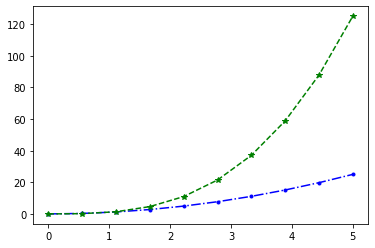

In [40]:
# Estilo MATLAB
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b.-.') # línea azul (b) discontinua (-.) con marcador de punto
ax.plot(x, x**3, 'g*--'); # línea punteada verde (g) con marcador de *

#### **3.3.2. Colores usando el argumento `color`**
---
Podemos definir colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor *alfa* de transparencia utilizando los argumentos de palabras clave **`color`** y **`alpha`**. El valor alfa indica la opacidad o transparencia del elemento. Para más información del código de colores consulte la siguiente [página](https://www.w3schools.com/colors/colors_picker.asp), en donde encontrará un selector con el código de colores usado.




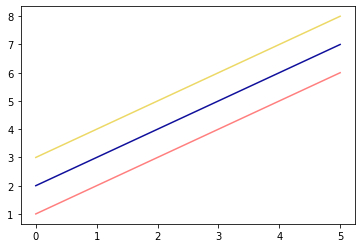

In [41]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5)     # Medio-transparente (alpha=0.5)
ax.plot(x, x+2, color="#10109C")            # Código hexadecimal RGB
ax.plot(x, x+3, color=(0.9,0.8,0.2,0.75))   # Valores porcentuales de los valores RGBA


#### **3.3.3. Estilos de líneas y marcadores**
---
Para cambiar el ancho de línea se utiliza el argumento **`linewidth`** (o su abreviación **`lw`**). El estilo de línea se puede seleccionar mediante el argumento **`linestyle`** (o **`ls`**). En la siguiente celda se presentan muchos ejemplos donde se pueden ver otros parámetros que se podrían personalizar adicionalmente:

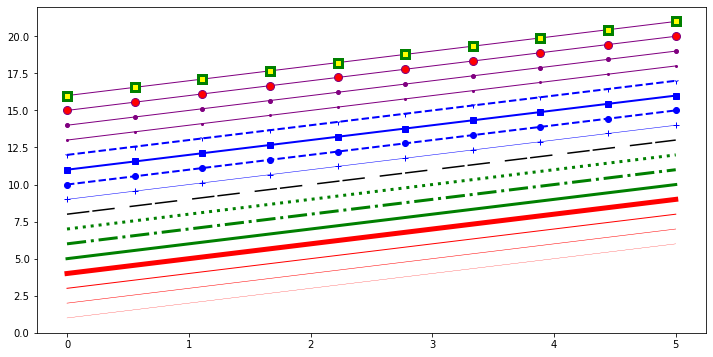

In [42]:
fig, ax = plt.subplots(figsize=(12,6))

# linewidth
ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=5.00)

# linestyle: ‘-‘, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# Línea personalizada
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([15, 2, 15, 10]) # formato: longitud de línea, longitud de espacio, ...

# Marcadores: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=0.5, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=2, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=2, ls='--', marker='1')

# Tamaño y color del marcador
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### **3.4. Rango de los ejes**
---

Podemos configurar los rangos de los ejes usando los métodos **`set_ylim`** y **`set_xlim`** del objeto del eje, o llamando al método **`autoscale(tight = True)`** para obtener automáticamente rangos de ejes "ajustados":

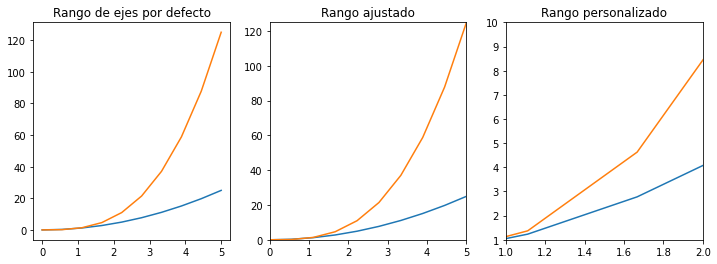

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2) # Se puede graficar sobre la misma figura llamando varias veces a plot()
axes[0].plot(x, x**3)
axes[0].set_title("Rango de ejes por defecto")

axes[1].plot(x, x**2, x, x**3) # Se puede hacer esto en una sola línea
axes[1].autoscale(axis='both', tight=True)     #axis : ['both' | 'x' | 'y']; por defecto: 'both'
axes[1].set_title("Rango ajustado")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_xlim([1, 2])
axes[2].set_ylim([1, 10])
axes[2].set_title("Rango personalizado"); # Esta subfigura muestra un zoom sobre la figura original en un rango personalizado

### **3.5. Ocultar elementos**
---

Además de la personalización descrita hasta ahora, *Matplotlib* permite ocultar componentes de la visualización, como los ejes, etiquetas o leyenda. En la mayoría de los casos es suficiente con no especificar el elemento. Por ejemplo, si se desea ocultar los ticks (marcas "-") de los ejex $x$ y $y$, se puede acceder a ellos y ocultarlos con el método **`set_visible`**.

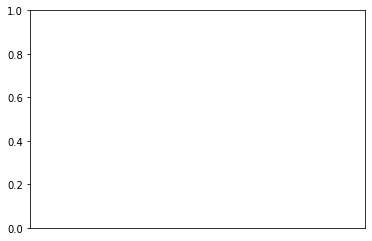

In [44]:
fig, ax = plt.subplots()
ax.xaxis.set_visible(False) # Ocultar los tics del eje X.

Si se quieren eliminar o personalizar las líneas que rodean a los ejes, se puede usar el método **`axis`** en un objeto **`Axes`** con el argumento **`'off'`**.

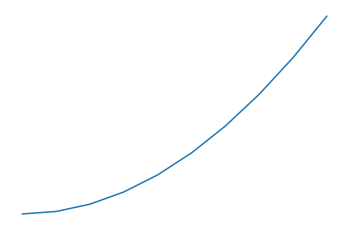

In [45]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axis('off'); # Si el parámetro ingresado es 'off', ningún eje se visualizará.

## **4. Exportar Figuras**
---

*Matplotlib* permite generar archivos de alta calidad en varios formatos, como PNG, JPG, EPS, SVG, PGF y PDF.

Para guardar una figura en un archivo, podemos usar el método **`savefig`** de la clase **`Figure`**, el cual recibe como parámetro obligatorio el nombre del archivo de salida, con la extensión que define el formato del archivo generado. Además, acepta otros argumentos que permiten modificar la calidad y características del archivo generado.


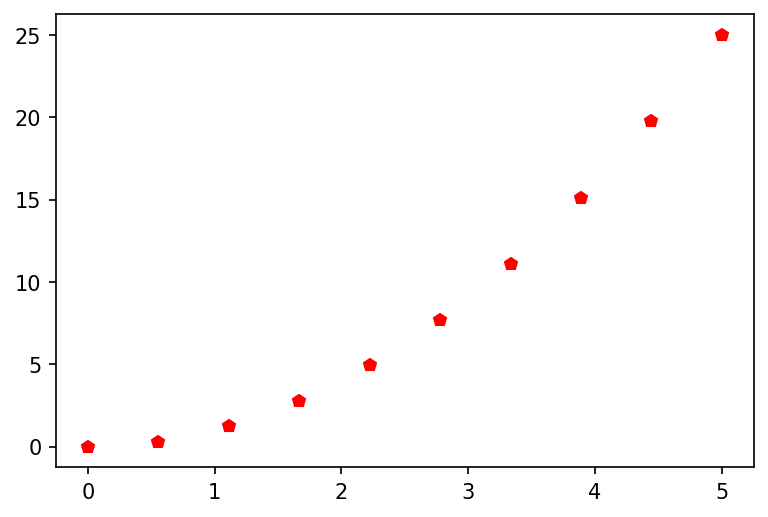

In [17]:
fig, ax = plt.subplots(dpi = 150)
ax.plot(x, y, 'rp');

También se puede especificar el *DPI* en el momento de la generación del archivo:

In [18]:
fig.savefig("images/figura_dpi200.png", dpi=200)

In [19]:
# Generando un PDF
fig.savefig("images/figura.pdf")

In [20]:
fig.savefig("images/figura.png", 
            transparent=True, #Generar imagen con transparencia
            dpi = 200)

> **IMPORTANTE:** Siempre que sea posible, le recomendamos exportar las figuras a [formatos vectoriales](https://es.wikipedia.org/wiki/Gr%C3%A1fico_vectorial) como PDF, EPS o SVG. Esto le garantizará mantener la mejor resolución y calidad en sus visualizaciones.

*Matplotlib* dispone de otro módulo para el manejo de imágenes. Aunque su revisión está por fuera del alcance de esta guía. Se utilizará a continuación para cargar y mostrar la imagen generada en formato **`PNG`**.

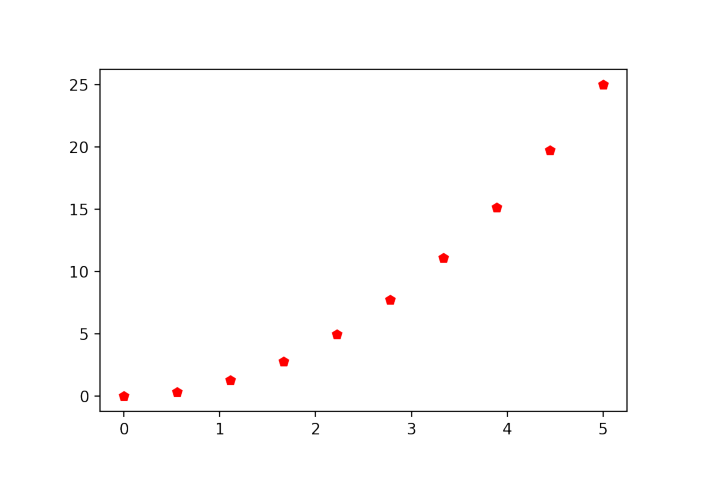

In [23]:
import matplotlib.image as mpimg
img = mpimg.imread('images/figura.png')

fig, ax = plt.subplots(dpi = 150)
ax.axis('off')

plt.imshow(img);

## **5. Tipos de gráficos especiales**
---

Al igual que con *Pandas*, en *Matplotlib* se pueden crear varios tipos de gráficos estadísticos comunes: gráficas de barras, histogramas, diagramas de dispersión, y muchos más. La mayoría de estos gráficos los crearemos en el siguiente material usando ***Seaborn***, una librería especializada en la construcción de visualizaciones de datos estadísticos para *Python*. Sin embargo, aquí se presentan algunos ejemplos con *matplotlib*, que son los usados por el submódulo **`plot`** de *pandas*.

La forma de uso de estas funciones, es similar al de la función **`plot`**; se envían como argumentos básicos los datos a graficar contenidos en dos arreglos, y es posible la personalización de algunas propiedades del gráfico de acuerdo con el tipo de visualización que se esté usando mediante el envío de argumentos opcionales.


### **5.1. Diagramas de dispersión: `scatter()`**
---

En el ejemplo siguiente se usa la función **`scatter`**, con la cual se grafican los datos como se ve en el ejemplo. Adicionalmente permite uso de algunos modificadores como el caso de **`'marker'`** para definir la representación de los puntos en la gráfica.

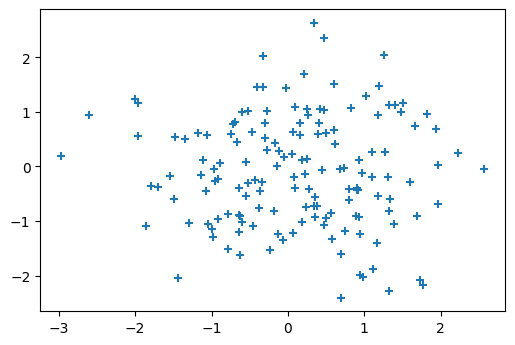

In [24]:
x_s = np.random.randn(150)
y_s = np.random.randn(150)

plt.figure(dpi = 100)
plt.scatter(x_s, y_s, marker='+');

### **5.2. Histogramas: `hist()`**
---

Esta función permite la diagramación de los datos con estilo tipo histograma, como se discutió en la Unidad 2.

El parámetro **bins** define la cantidad de barras para el diagrama (intervalos de clase), este puede ser un valor numérico, un rango, o una cadena. Para el caso de una cadena, esta debe corresponder a uno de los valores preestablecidos, los cuales puede consultar en la [documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) en donde también se detallan los parámetros que acepta esta función.


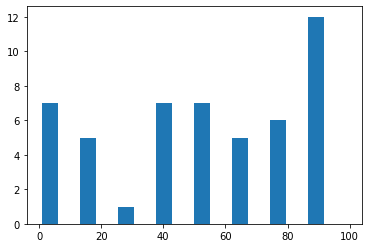

In [25]:
data = np.random.randint(1, 100, 50)  # De esta forma se genera un arreglo de 500 elementos con valores aleatorios comprendidos entre 1 y 100
plt.hist(data, bins=8, width=5);   # bins define el número de barras (10 por defecto)

### **5.3. Gráfica de cajas: `boxplot()`**
---
Mediante esta función se grafican los datos en un diagrama de cajas. Para el ejemplo siguiente se grafican los diagramas de caja de tres arreglos generados aleatoriamente con desviación estándar de 1, 2 y 3 respectivamente:

In [26]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)] # Contendrá 3 arreglos de 100 elementos cada uno, 
                                                              # con valores aleatorios de distribución normal
                                                              # con desviación estándar variando entre 1 y 3                                                               

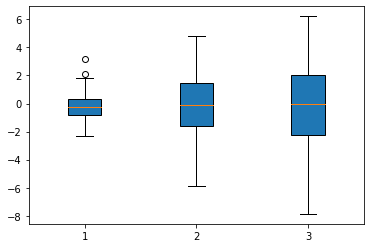

In [27]:
# Boxplot rectangular
plt.figure()
plt.boxplot(data, vert=True, patch_artist=True)
plt.show()

## **Recursos adicionales**
---
Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Matplotlib*:


* [*Matplotlib*: Visualization with Python](http://www.matplotlib.org) 
* [Matplotlib Gallery - (Ejemplos)](http://matplotlib.org/gallery.html) - Se recomienda revisar la galería y ajustar el código de las visualizaciones requeridas.
* [Nicolas P. Rougier - *Matplotlib* tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [IBM (Coursera) - Data Visualization with *Python*](https://www.coursera.org/learn/python-for-data-visualization)
* [DataCamp - Introduction to Data Visualization with *Matplotlib*](https://www.datacamp.com/courses/introduction-to-matplotlib)

